Abhinav Malik

## Research question/interests

Briefly describe your research question or interests here.

**What is the relationship between body mass index (BMI) and smoking status and their impact on an individual's medical expenses in the United States?**

I plan on analyzing the impact of body mass index (BMI) and smoking status on medical expenses in the US using the Medical Cost Personal Datasets from Kaggle. The analysis will involve cleaning and pre-processing the data, exploring the relationship between the variables using descriptive statistics and data visualization, running regression models to quantify the relationship, and performing subgroup analysis to identify demographic differences. The findings will shed light on the importance of prevention and early intervention in reducing healthcare costs associated with obesity and smoking.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataframe = pd.read_csv('../data/raw/Medical_Cost.csv')
plt.style.use('ggplot')
sns.set_style('darkgrid')
print(dataframe)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


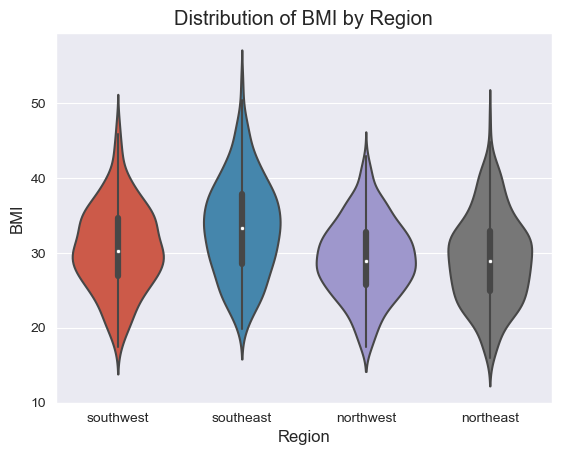

In [53]:
sns.violinplot(data=dataframe, x='region', y='bmi')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.title('Distribution of BMI by Region')
plt.show()

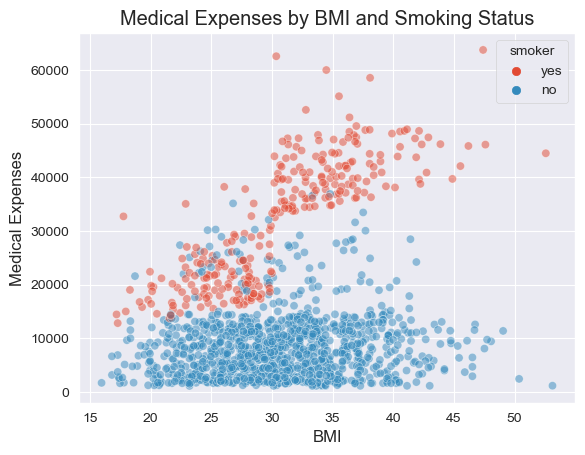

In [26]:
sns.scatterplot(data=dataframe, x='bmi', y='charges', hue='smoker', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Medical Expenses')
plt.title('Medical Expenses by BMI and Smoking Status')
plt.show()

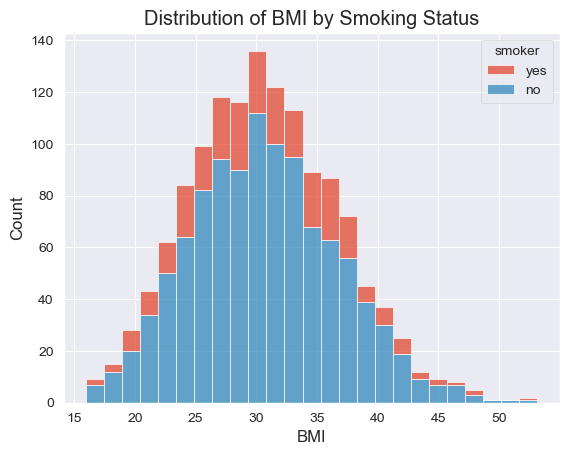

In [49]:
sns.histplot(data=dataframe, x='bmi', hue='smoker', multiple='stack')
plt.title('Distribution of BMI by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()